Certification_case_study1

In [58]:
import pandas as pd
import numpy as np
mash = pd.read_csv('C:\\edureka\\certification\\Data_set\\OnlineNewsPopularity.csv')
mash.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


EDA and Feature selection

In [4]:
mash.shape

(39644, 61)

In [3]:
mash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
timedelta                         39644 non-null float64
n_tokens_title                    39644 non-null float64
n_tokens_content                  39644 non-null float64
n_unique_tokens                   39644 non-null float64
n_non_stop_words                  39644 non-null float64
n_non_stop_unique_tokens          39644 non-null float64
num_hrefs                         39644 non-null float64
num_self_hrefs                    39644 non-null float64
num_imgs                          39644 non-null float64
num_videos                        39644 non-null float64
average_token_length              39644 non-null float64
num_keywords                      39644 non-null float64
data_channel_is_lifestyle         39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus               396

In [10]:
mash.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


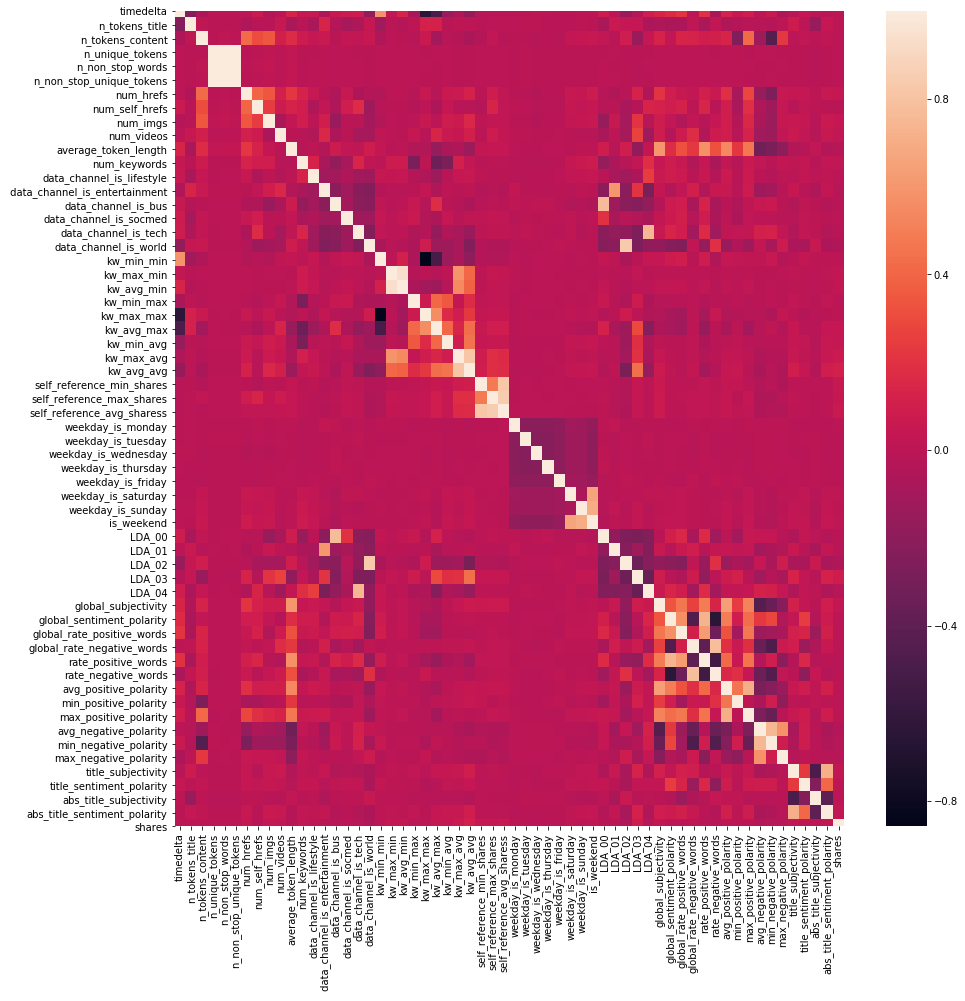

In [11]:
corr = mash.corr()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 15
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

finding the list of features that are highly correlated to the target-"shares"

In [51]:
corr_features = []
for i in range(len(corr)-1):
    if abs(corr.iloc[i,59])>=0.05:
        corr_features.append(corr.columns[i])
corr_features  

['kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_avg_sharess',
 'LDA_02',
 'LDA_03']

In [82]:
mash.shape

(39644, 61)

In [32]:
X = mash.iloc[:,1:60]
y = mash.iloc[:,60]

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 43)
sel = SelectFromModel(LinearRegression())
sel.fit(X_train, y_train)

SelectFromModel(estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                           n_jobs=None, normalize=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [34]:
sel.get_support()

array([False, False, False,  True,  True,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False,  True])

In [35]:
sel.estimator_.coef_

array([ 1.96064655e+00,  1.13000888e+02,  2.40652759e-01,  3.76095043e+03,
       -3.18653048e+03, -1.32024013e+03,  2.12770803e+01, -5.37454970e+01,
        2.25366109e+01,  1.38704293e+01, -3.71640648e+02,  4.97855973e+01,
       -8.98995840e+02, -1.01047546e+03, -7.19449973e+02, -4.73864988e+02,
       -6.88619379e+02, -2.03268380e+02, -1.27484009e-02,  1.61231366e-01,
       -8.02630810e-01, -2.72559554e-03, -2.45362385e-04,  2.64910805e-04,
       -4.03265224e-01, -2.22301975e-01,  1.78695493e+00,  5.21312344e-03,
       -1.69820093e-03,  1.01910414e-02,  3.70893720e+02, -1.38550616e+02,
       -9.51347105e+01, -7.79971681e+01, -1.17297913e+02,  3.37931102e+01,
        2.42935774e+01,  5.80866876e+01,  3.69674156e+02, -2.27882246e+02,
       -6.28307997e+02,  5.07103736e+01,  4.35805714e+02,  3.42218976e+03,
        1.51003421e+03, -1.09090371e+04, -1.17923006e+04,  1.76029170e+03,
        2.88941850e+03, -3.10445419e+03, -1.72716659e+03,  1.13059585e+03,
       -5.22511098e+02, -

In [40]:
features = X.columns[sel.get_support()]
features =list(features)
features

['n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 ' data_channel_is_entertainment',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 'rate_negative_words',
 'avg_positive_polarity',
 'min_positive_polarity',
 'max_positive_polarity',
 'abs_title_sentiment_polarity']

In [52]:
final_features = features+corr_features  
final_features

['n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 ' data_channel_is_entertainment',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 'rate_negative_words',
 'avg_positive_polarity',
 'min_positive_polarity',
 'max_positive_polarity',
 'abs_title_sentiment_polarity',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_avg_sharess',
 'LDA_02',
 'LDA_03']

In [ ]:
X_select = mash.loc[:,final_features]
X_select.head()
X_select.shape

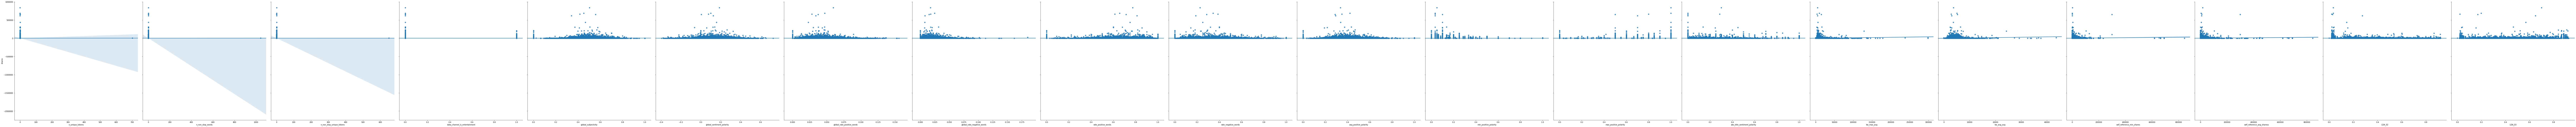

In [56]:
import seaborn as sns
sns.pairplot(mash,x_vars=final_features, y_vars = 'shares',height=10, aspect=1,kind='reg')

The question in the case study ask us to predict the number of shares. Predicting a continuous number would indicate it to be a regression problem. However the nature of the variables clearly indicate that this is NOT a regression problem and the number of shares CANNOT be predicted. It can be a classification problem to predict whether an artcile can be popular or not based on a certain thereshold value of the number of shares of an article. 

Considering the threshold of popularity of an aritcle at the number of shares at 50% which is 1400

In [ ]:
mash.drop('url', inplace=True)

In [70]:
mash.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [72]:
mash[mash['shares']>1400].shares.count()

19562

In [73]:
mash[mash['shares']<=1400].shares.count()

20082

In [ ]:
mash['target'] = mash.shares.map(lambda x:1 if x>1400 else 0)
mash.drop('shares', inplace=True)

In [77]:
mash.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,target
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0


In [171]:
mash.shape

(39644, 61)

Creating the parameters for the bar-plot for count of pop Vs unpop shares published on each day of the week

In [139]:
mash_pop=[]
mash_unpop=[]
col = np.array(mash.columns)
count = 0
for i in col:
    if i =='weekday_is_monday':
        break
    count = count+1    
print(count)
for j in range(count,count+7):
    temp_pop = mash[(mash[col[j]]==1) & (mash['target']==1)].target.count()
    mash_pop.append(temp_pop)
    temp_unpop = mash[(mash[col[j]]==1) & (mash['target']==0)].target.count()
    mash_unpop.append(temp_unpop)
mash_pop   
mash_unpop
day = np.arange(count,count+7)
day_name = [col[count] for count in range(count,count+7)]
day_name

30


['weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday']

Exploratory data Analysis

Plotting the popular shares based the day of publication

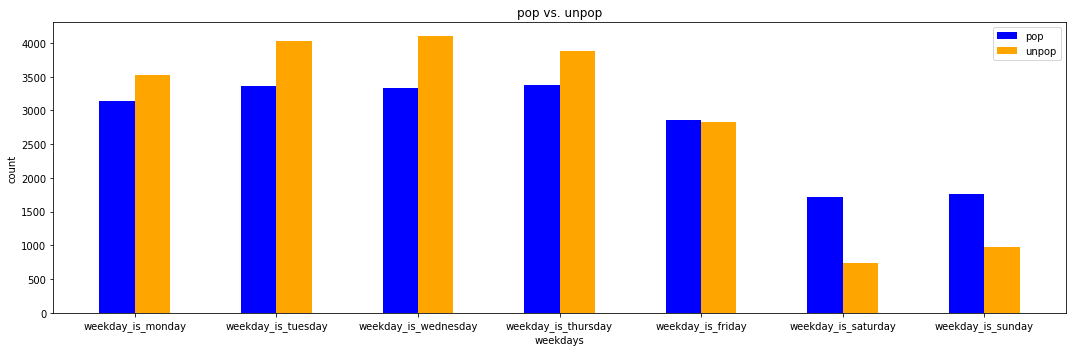

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline
rcParams['figure.figsize'] = 15, 5
bar_width = .25
plt1 = plt.bar(day, mash_pop, bar_width,color='blue', label='pop')
plt2 = plt.bar(day+bar_width,mash_unpop, bar_width,color='orange', label='unpop')  
plt.xlabel('weekdays')
plt.ylabel('count')
plt.title('pop vs. unpop')
plt.xticks(day+(bar_width/2), day_name)
plt.legend()
plt.tight_layout()
plt.show()

Creating the parameters for the bar-plot for count of pop Vs unpop shares by the category of articles

In [144]:
mash_cat_pop=[]
mash_cat_unpop=[]
cat_col = np.array(mash.columns)
temp = 0
for i in cat_col:
    if i =='data_channel_is_lifestyle':
        break
    temp = temp+1    
print(count)
for j in range(temp,temp+6):
    cat_pop = mash[(mash[col[j]]==1) & (mash['target']==1)].target.count()
    mash_cat_pop.append(cat_pop)
    cat_unpop = mash[(mash[col[j]]==1) & (mash['target']==0)].target.count()
    mash_cat_unpop.append(cat_unpop)
mash_cat_pop   
mash_cat_unpop
cat = np.arange(temp,temp+6)
cat_name = [cat_col[temp] for temp in range(temp,temp+6)]
cat_name

30


['data_channel_is_lifestyle',
 ' data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world']

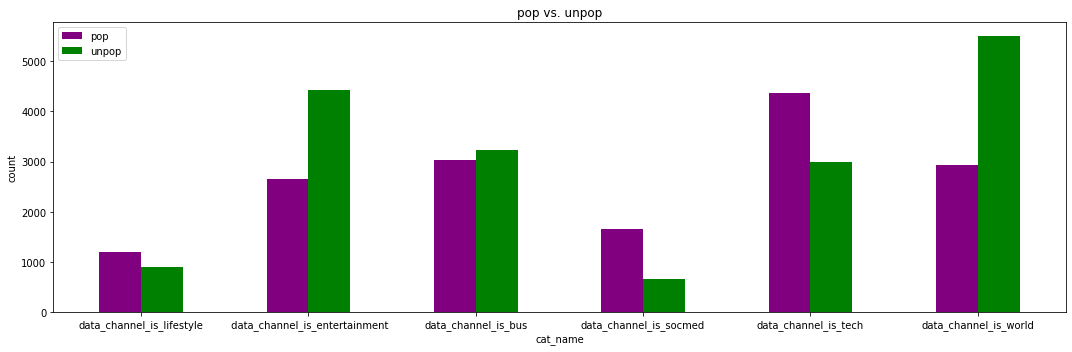

In [145]:
import matplotlib.pyplot as plt
%matplotlib inline
rcParams['figure.figsize'] = 15, 5
bar_width = .25
plt1 = plt.bar(cat, mash_cat_pop, bar_width,color='purple', label='pop')
plt2 = plt.bar(cat+bar_width,mash_cat_unpop, bar_width,color='green', label='unpop')  
plt.xlabel('cat_name')
plt.ylabel('count')
plt.title('pop vs. unpop')
plt.xticks(cat+(bar_width/2), cat_name)
plt.legend()
plt.tight_layout()
plt.show()

Scaling the data of those features which whose max value is more than 1

In [177]:
mash_col = mash.columns
stat = mash.describe()
feature_select = []
for i in range(len(mash_col)):
        if (stat.iloc[7,i]>1):
            feature_select.append(mash_col[i])
X= mash.iloc[:,0:59]
X.head()
y = mash[['target']]
y
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[feature_select] = scaler.fit_transform(mash[feature_select])
X.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  del sys.path[0]


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,1.75788,0.757447,-0.695210,0.032772,0.000675,0.038658,-0.607463,-0.335566,-0.426526,-0.304268,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,-0.241028
1,1.75788,-0.661657,-0.618794,0.016056,0.000675,0.031479,-0.695709,-0.594963,-0.426526,-0.304268,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,-0.230879
2,1.75788,-0.661657,-0.712192,0.007645,0.000675,-0.007752,-0.695709,-0.594963,-0.426526,-0.304268,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,-0.163018
3,1.75788,-0.661657,-0.032933,-0.012619,0.000675,-0.007211,-0.166229,-0.854360,-0.426526,-0.304268,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,-0.188821
4,1.75788,1.230482,1.115439,-0.037655,0.000675,-0.045420,0.716237,4.074185,1.860061,-0.304268,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,-0.248596


Feature Selection

Feature Selection - approach 1: Feature Importance using ExtraTreesClassifier

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[0.01899095 0.01681255 0.01729593 0.01637522 0.00033968 0.01701303
 0.01723965 0.01495724 0.01771386 0.01331138 0.01653441 0.01729761
 0.0030651  0.01092376 0.00506152 0.00891366 0.00865437 0.01137458
 0.01039503 0.01627091 0.01592997 0.01387845 0.00895846 0.01772402
 0.02457367 0.0175858  0.02175434 0.01653576 0.01562234 0.0163496
 0.00708497 0.00730698 0.00696139 0.00735106 0.00670734 0.00588849
 0.00310043 0.01112836 0.01977652 0.01917816 0.02322742 0.01821188
 0.01797836 0.01759374 0.01572517 0.01684047 0.01550529 0.0155284
 0.01600245 0.0152514  0.01606357 0.01476705 0.01541139 0.01596314
 0.01462548 0.01529798 0.01448845 0.01531219 0.18426963]


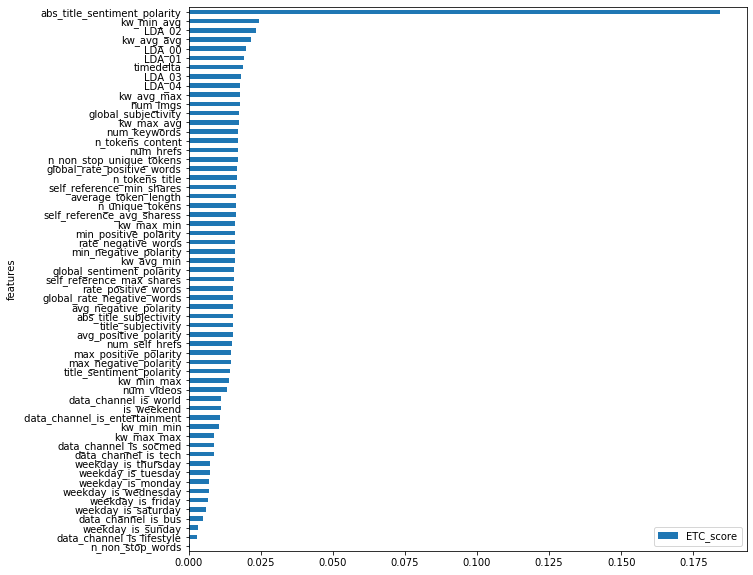

,ETC_score
features,
timedelta,0.018991
n_tokens_title,0.016813
n_tokens_content,0.017296
n_unique_tokens,0.016375
n_non_stop_words,0.000340
n_non_stop_unique_tokens,0.017013
num_hrefs,0.017240
num_self_hrefs,0.014957
num_imgs,0.017714


In [214]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
#X is defined in the standardscaler scaled dataframe
y = mash[['target']]
model.fit(X,y)
print(model.feature_importances_)
feature_imp = pd.DataFrame({'ETC_score':model.feature_importances_})
feature_imp
dfcolumns = pd.DataFrame({'features':X.columns})
dfcolumns
featureimp = pd.concat([dfcolumns,feature_imp],axis=1)
featureimp.set_index('features',inplace=True)
featureimp_sorted = featureimp.sort_values('ETC_score')
featureimp_sorted.plot(kind='barh')
plt.show()
featureimp

Feature Selection - approach 2: Feature selection using RandomForestClassifier

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[4.37401109e-03 2.04267151e-03 3.39312857e-03 3.84053156e-03
 1.31481578e-05 4.18028143e-03 3.92047032e-03 1.48974395e-03
 2.24113426e-03 9.45999438e-04 3.34885190e-03 1.49514617e-03
 5.24317638e-04 7.57863699e-03 8.77610955e-04 1.25642221e-03
 1.91215069e-03 4.85835546e-03 1.77759716e-03 3.41162823e-03
 5.16814641e-03 2.20963325e-03 6.18670018e-04 3.29975724e-03
 4.50031266e-03 1.41101348e-02 9.86152561e-03 5.29023154e-03
 5.22609327e-03 5.75300818e-03 4.14368337e-04 3.67157623e-04
 3.49623729e-04 3.68963319e-04 3.17365313e-04 1.30047024e-03
 9.95432950e-04 6.13456437e-03 3.50386531e-03 3.94714640e-03
 7.87645696e-03 3.34903177e-03 4.14367238e-03 3.45801895e-03
 3.20428500e-03 3.63795572e-03 2.79545731e-03 2.29077380e-03
 2.24498054e-03 3.15912005e-03 1.45821750e-03 1.15592087e-03
 2.96429202e-03 1.94654884e-03 1.53784634e-03 1.85703685e-03
 2.66192149e-03 1.81993722e-03 8.21220218e-01]


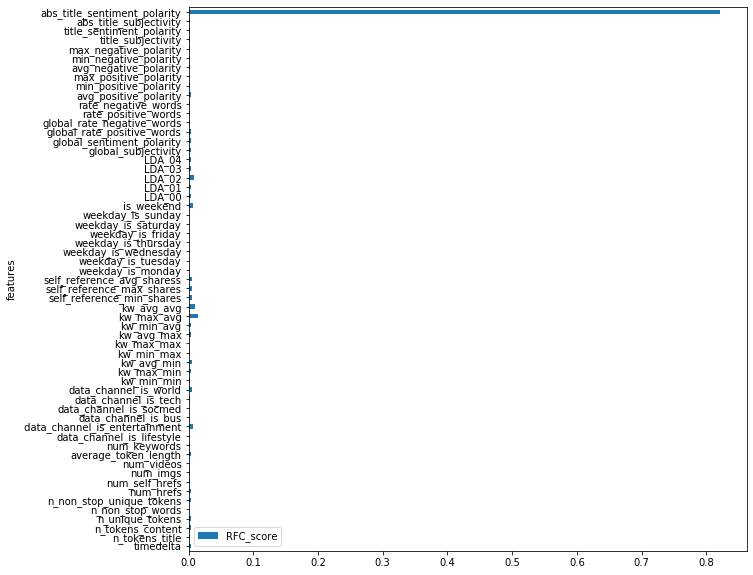

,RFC_score
features,
timedelta,0.004374
n_tokens_title,0.002043
n_tokens_content,0.003393
n_unique_tokens,0.003841
n_non_stop_words,0.000013
n_non_stop_unique_tokens,0.004180
num_hrefs,0.003920
num_self_hrefs,0.001490
num_imgs,0.002241


In [228]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X,y)
print(clf.feature_importances_)
impfeature = pd.DataFrame({'RFC_score':clf.feature_importances_})
dfcolumns = pd.DataFrame({'features':X.columns})
dfcolumns
impfeature = pd.concat([dfcolumns,impfeature],axis=1)
impfeature.set_index('features',inplace=True)
impfeature
impfeature.plot(kind='barh')
plt.show()
RFC = impfeature
RFC

Feature Selection - approach 3:Recursive Feature Elemination

In [218]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
mod = LogisticRegression()
rfe = RFE(mod)
rfe_fit = rfe.fit(X, y)
rfe.support_
featureRFE = pd.DataFrame({'RFE_score':rfe.support_})
featureRFE
RFE = pd.concat([dfcolumns,featureRFE],axis=1)
RFE = RFE.set_index('features')
RFE 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will b

,RFE_score
features,
timedelta,False
n_tokens_title,False
n_tokens_content,False
n_unique_tokens,False
n_non_stop_words,True
n_non_stop_unique_tokens,True
num_hrefs,False
num_self_hrefs,False
num_imgs,False


Combining the results of all the feature selection models used

In [230]:
from functools import reduce
fs = [RFC,RFE,featureimp]
final_results = reduce(lambda x,y: pd.merge(x,y,on ='features'),fs)
final_results
final_results['RFE_score'] = final_results['RFE_score'].astype(int)
final_results
final_results['total_score'] = final_results['RFC_score']+final_results['RFE_score']+final_results['ETC_score']
final_results = final_results.sort_values('total_score',ascending = False)
final_results

,RFC_score,RFE_score,ETC_score,total_score
features,,,,
abs_title_sentiment_polarity,0.821220,1,0.184270,2.005490
LDA_02,0.007876,1,0.023227,1.031104
LDA_00,0.003504,1,0.019777,1.023280
LDA_01,0.003947,1,0.019178,1.023125
LDA_04,0.004144,1,0.017978,1.022122
LDA_03,0.003349,1,0.018212,1.021561
n_non_stop_unique_tokens,0.004180,1,0.017013,1.021193
global_subjectivity,0.003458,1,0.017594,1.021052
global_rate_positive_words,0.003638,1,0.016840,1.020478


sorting the features according to best score

In [238]:
select_features = final_results.sort_values('total_score',ascending = False).nlargest(30,'total_score')
X_features = np.array(select_features.index)
X_features

array(['abs_title_sentiment_polarity', 'LDA_02', 'LDA_00', 'LDA_01',
       'LDA_04', 'LDA_03', 'n_non_stop_unique_tokens',
       'global_subjectivity', 'global_rate_positive_words',
       ' data_channel_is_entertainment', 'avg_positive_polarity',
       'avg_negative_polarity', 'global_rate_negative_words',
       'min_positive_polarity', 'is_weekend', 'title_sentiment_polarity',
       'abs_title_subjectivity', 'max_positive_polarity',
       'data_channel_is_tech', 'data_channel_is_socmed',
       'weekday_is_thursday', 'weekday_is_tuesday', 'weekday_is_monday',
       'weekday_is_wednesday', 'weekday_is_saturday', 'weekday_is_friday',
       'data_channel_is_bus', 'weekday_is_sunday', 'n_non_stop_words',
       'kw_max_avg'], dtype=object)

Conducting PCA to reduce dimensions

In [240]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X[X_features])
mash_pca = pca.transform(X[X_features])
mash_pca_dataframe = pd.DataFrame(mash_pca,columns = ['Dimension 1', 'Dimension 2'])
mash_pca_dataframe.head()

,Dimension 1,Dimension 2
0,0.035588,-0.827125
1,0.026908,-0.834605
2,-0.000694,-0.795617
3,0.002160,-0.804411
4,-0.027364,-0.882615


In [241]:
print (pca.explained_variance_ratio_)
import numpy as np
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
per_var

[0.33217356 0.17790279]


array([33.2, 17.8])

scree plot

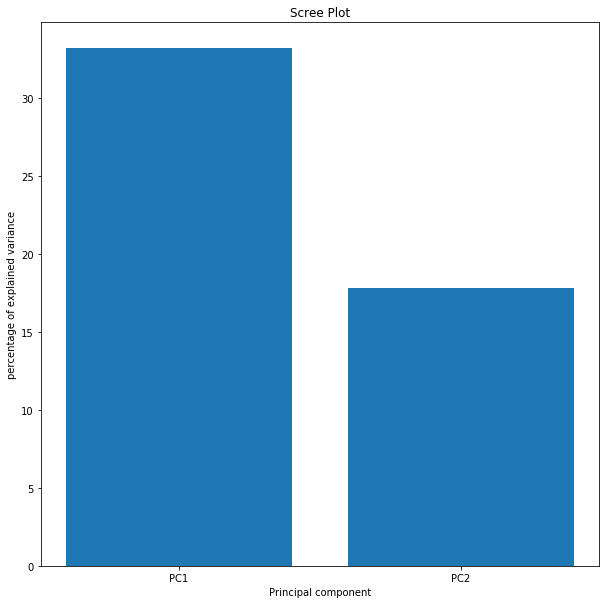

In [242]:
import matplotlib.pyplot as plt
labels = ['PC'+str(x) for x in range(1,len(per_var)+1)]
plt.bar(x = range(1,len(per_var)+1),height = per_var,tick_label = labels)
plt.ylabel("percentage of explained variance")
plt.xlabel('Principal component')
plt.title('Scree Plot')
plt.show()

In [243]:
mash_pca_dataframe_pop = mash_pca_dataframe[mash['target']==1]
mash_pca_dataframe_unpop = mash_pca_dataframe[mash['target']==0]

scatter_plot with 2 dimensions

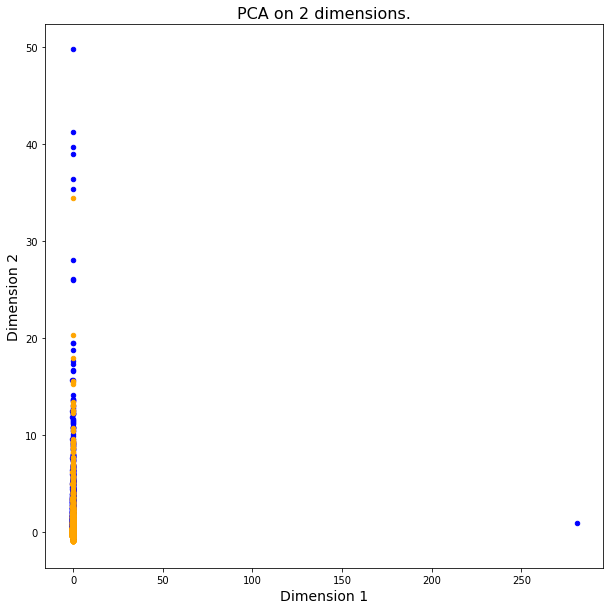

In [244]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 10
plt.scatter(x=mash_pca_dataframe_pop.loc[:, 'Dimension 1'], y=mash_pca_dataframe_pop.loc[:, 'Dimension 2'],c='blue', s = 20)
plt.scatter(x=mash_pca_dataframe_unpop.loc[:, 'Dimension 1'], y=mash_pca_dataframe_unpop.loc[:, 'Dimension 2'],c='orange', s = 20)
plt.xlabel("Dimension 1", fontsize=14)
plt.ylabel("Dimension 2", fontsize=14)
plt.title("PCA on 2 dimensions.", fontsize=16);

Now considering 95% variance while computing 0.95

In [245]:
pca = PCA(0.95)
pca.fit(X[X_features])
mash_pca_95 = pd.DataFrame(pca.transform(X[X_features]))
mash_pca_95

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.035588,-0.827125,0.455803,-0.674753,-0.334948,-0.215737,-0.006834,0.053030,0.897600,-0.378867,-0.232272,0.315463,0.085084,-0.059595
1,0.026908,-0.834605,0.479816,-0.367078,0.982303,0.128645,-0.056203,-0.028429,0.926957,-0.278289,-0.088927,-0.022519,0.212892,0.030000
2,-0.000694,-0.795617,0.539407,0.000585,0.665560,0.068859,-0.039310,0.003916,0.943995,-0.313126,-0.180967,-0.064978,-0.037810,-0.305516
3,0.002160,-0.804411,0.497376,-0.630946,-0.543009,-0.261474,-0.001902,0.070955,0.853844,-0.246019,0.105740,0.498318,-0.044673,-0.062923
4,-0.027364,-0.882615,0.503432,0.963785,-0.208942,-0.118283,0.003592,0.102304,0.944750,-0.314041,-0.144319,-0.120032,-0.188802,-0.043833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,-0.000089,-0.341421,0.126852,0.997706,-0.097514,-0.292377,0.791334,-0.213723,-0.176026,-0.194717,-0.129684,0.045538,0.090388,-0.046530
39640,0.040542,-0.065898,-0.091633,-0.181140,-0.007184,-0.205023,0.745884,-0.261467,-0.318708,-0.004986,0.327982,-0.752150,-0.827208,0.444321
39641,-0.012002,0.096331,-0.250867,-0.112362,0.011683,-0.250006,0.764869,-0.259884,-0.273052,-0.065407,0.172805,-0.516884,0.104704,0.217893
39642,0.001627,-0.428955,0.117800,-0.063169,0.091594,-0.236250,0.765624,-0.256709,-0.316565,0.140300,0.713794,0.291990,0.089345,0.125341


Train_Test_Split

In [249]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(mash_pca_95,mash[['target']],test_size=0.1, random_state=7)

Model 1: Using Logistic_Regression

In [250]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.975031525851198


Model 2: Using KNN with hyper-parameter tuning

In [252]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
k_range=range(1,26)
score = []
for k in k_range:
    X_train,X_test,y_train,y_test=train_test_split(mash_pca_95,mash[['target']],test_size=0.1, random_state=7)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    score.append(metrics.accuracy_score(y_test,y_pred))
#thelist prints all the value of accuracy for each K
score    
dict(zip(k_range,score))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == 

{1: 0.7949558638083228,
 2: 0.7891551071878941,
 3: 0.8060529634300126,
 4: 0.8015132408575032,
 5: 0.8098360655737705,
 6: 0.8045397225725095,
 7: 0.8116015132408575,
 8: 0.8073139974779319,
 9: 0.8095838587641866,
 10: 0.8060529634300126,
 11: 0.8146279949558638,
 12: 0.8108448928121059,
 13: 0.8153846153846154,
 14: 0.808827238335435,
 15: 0.8126103404791929,
 16: 0.8045397225725095,
 17: 0.8100882723833543,
 18: 0.8025220680958386,
 19: 0.8032786885245902,
 20: 0.801765447667087,
 21: 0.8063051702395965,
 22: 0.7974779319041614,
 23: 0.8050441361916771,
 24: 0.7987389659520807,
 25: 0.8055485498108449}

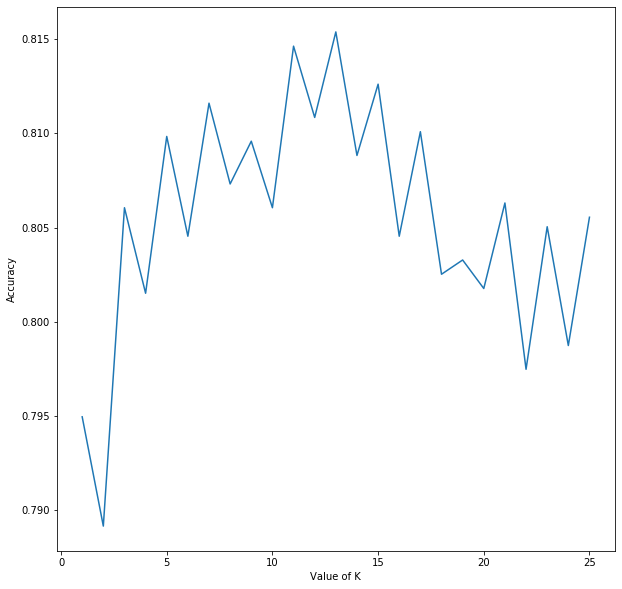

In [253]:
import matplotlib.pyplot as plt
plt.plot(k_range,score)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.show()

Model 4: Using Decision Tree-with hyper-parameter tuning

In [254]:
X_train,X_test,y_train,y_test=train_test_split(mash_pca_95,mash[['target']],test_size=0.1, random_state=7)
from sklearn.tree import DecisionTreeClassifier
treeClf = DecisionTreeClassifier(max_depth = 3, random_state = 7)
treeClf.fit(X_train,y_train)
y_pred = treeClf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.7808322824716267


Model 5: Using SVM

In [267]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9556116015132409

In [268]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9556116015132409

In [269]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8905422446406053

Using Decision Tree and ADA Boost

In [270]:
from sklearn.tree import DecisionTreeClassifier
treeClf = DecisionTreeClassifier(max_depth = 3, random_state = 7)
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
Est_range = range(1,17)
score = []
for i in Est_range:
    abc = AdaBoostClassifier(n_estimators=i, base_estimator=treeClf,learning_rate=1)
    abc.fit(X_train,y_train)
    y_pred = abc.predict(X_test)
    score.append(metrics.accuracy_score(y_test,y_pred))
dict(zip(Est_range,score))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{1: 0.7808322824716267,
 2: 0.8431273644388398,
 3: 0.8854981084489281,
 4: 0.8960907944514502,
 5: 0.8940731399747793,
 6: 0.9200504413619168,
 7: 0.9223203026481716,
 8: 0.9366960907944515,
 9: 0.9432534678436317,
 10: 0.9435056746532157,
 11: 0.9424968474148802,
 12: 0.9427490542244641,
 13: 0.9447667087011349,
 14: 0.9470365699873896,
 15: 0.9495586380832283,
 16: 0.9513240857503152}

Therefore we can conclude that Logistic Regression, SVM with C=1, and ADA Boost with n_estimaor =16 each gives us a high accuracy of 95%

In [271]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[1929,   87],
       [ 106, 1843]], dtype=int64)

In [274]:
print(metrics.accuracy_score(y_test,y_pred))

0.9513240857503152


In [275]:
#Classification error aka: Misclassification Rate
print(1 - metrics.accuracy_score(y_test,y_pred))

0.04867591424968476


In [276]:
#sensitivity
print(metrics.recall_score(y_test,y_pred))

0.9456131349409954


In [277]:
#precision
print(metrics.precision_score(y_test,y_pred))

0.9549222797927461
